<a href="https://colab.research.google.com/github/tschelli/Makeover_Visualization/blob/main/Makeover_Monday_Visualization_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Makeover Monday Project
Coding Dojo Practice Assignment
- Name: Tyler Schelling
- Date Started: 10/5/2022

Dataset pulled from [Makeover Monday](https://data.world/makeovermonday/2022w40) Week 40.

- Original Visualization:

<img src="https://mediauploads.data.world/6f572e4d68cbb5434bb85c518107371f670c795165a53882ccc588376e933f27_CleanShot_2022_09_28_at_12.13.36.png">

##Mount Drive | Import Libraries | Load Data

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches

In [60]:
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/Income Inequality.xlsx'
df = pd.read_excel(filename)

## Exploring/Cleaning the data

In [61]:
df

,COUNTRY CODE,COUNTRY,REGION,SUB-REGION,G7,INDICATOR,SUBJECT,YEAR,VALUE
0,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2012,0.326
1,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2014,0.337
2,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2016,0.330
3,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2018,0.325
4,AUT,Austria,Europe,Western Europe,N,INCOME INEQUALITY,GINI,2007,0.284
...,...,...,...,...,...,...,...,...,...
499,ROU,Romania,Europe,Eastern Europe,N,INCOME INEQUALITY,GINI,2015,0.346
500,ROU,Romania,Europe,Eastern Europe,N,INCOME INEQUALITY,GINI,2016,0.332
501,ROU,Romania,Europe,Eastern Europe,N,INCOME INEQUALITY,GINI,2017,0.351
502,ROU,Romania,Europe,Eastern Europe,N,INCOME INEQUALITY,GINI,2018,0.350


In [62]:
df['COUNTRY'].value_counts().head()

Canada            44
Finland           32
United Kingdom    18
Latvia            17
Portugal          16
Name: COUNTRY, dtype: int64

In [63]:
plot_df = df.drop(columns = ['COUNTRY CODE', 'REGION', 'SUB-REGION', 'INDICATOR', 'SUBJECT'])
plot_df.head()

,COUNTRY,G7,YEAR,VALUE
0,Australia,N,2012,0.326
1,Australia,N,2014,0.337
2,Australia,N,2016,0.330
3,Australia,N,2018,0.325
4,Austria,N,2007,0.284


In [64]:
country_filter = (plot_df['COUNTRY'] != 'Costa Rica') & (plot_df['COUNTRY'] != 'Chile') & (plot_df['COUNTRY'] !=  'Bulgaria') & (plot_df['COUNTRY'] != 'Turkey') & (plot_df['COUNTRY'] != 'Lithuania')& (plot_df['COUNTRY'] != 'Latvia')
country_filter2 = (plot_df['COUNTRY'] != 'Israel') & (plot_df['COUNTRY'] != 'Romania') & (plot_df['COUNTRY'] != 'New Zealand') & (plot_df['COUNTRY'] != 'Spain') & (plot_df['COUNTRY'] != 'Switzerland') & (plot_df['COUNTRY'] != 'Portugal')
country_filter3 = (plot_df['COUNTRY'] != 'Greece') & (plot_df['COUNTRY'] != 'Luxembourg') & (plot_df['COUNTRY'] != 'Estonia') & (plot_df['COUNTRY'] != 'Netherlands') & (plot_df['COUNTRY'] != 'Ireland')

In [65]:
year_filter = (plot_df['YEAR'] >= 2017) & (plot_df['YEAR'] <= 2020)
plot_df = plot_df[year_filter & country_filter & country_filter2 & country_filter3]

In [66]:
plot_df = plot_df.sort_values('YEAR', ascending = False).drop_duplicates('COUNTRY', keep = 'first')
plot_df = plot_df.sort_values('VALUE', ascending = False).head(12)
plot_df['COUNTRY'].replace(to_replace = 'Russian Federation', value = 'Russia', inplace = True)
plot_df

,COUNTRY,G7,YEAR,VALUE
470,South Africa,N,2017,0.618
230,Mexico,N,2020,0.420
380,United States,Y,2019,0.395
373,United Kingdom,Y,2019,0.366
210,Japan,Y,2018,0.334
220,South Korea,N,2020,0.331
209,Italy,Y,2018,0.330
3,Australia,N,2018,0.325
420,Russia,N,2017,0.317
62,Canada,Y,2019,0.301


##Reproducing the original visualization

In [67]:
color_map = []
for ind in plot_df.index:
    if plot_df.loc[ind, 'G7'] == 'Y':
        color_map.append('red')
    else:
        color_map.append('grey')

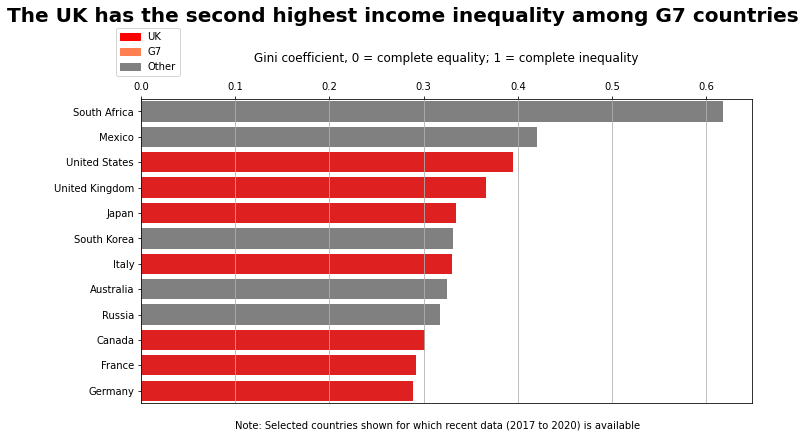

In [68]:
fig, axes = plt.subplots(figsize = (10,6))

sns.barplot(data = plot_df, x = 'VALUE', y = 'COUNTRY', palette = color_map)

suptitle1 = fig.suptitle('The UK has the second highest income inequality among G7 countries', fontsize = 20, fontweight = 'bold', y = 1.01)
axes.set_title('Gini coefficient, 0 = complete equality; 1 = complete inequality', y = 1.1)

axes.xaxis.set_ticks_position('top')
axes.grid(axis='x')
axes.set(xlabel=None, ylabel=None)

axes.text(.1, 12.5, 'Note: Selected countries shown for which recent data (2017 to 2020) is available')

uk_patch = mpatches.Patch(color = 'red', label = 'UK')
g7_patch = mpatches.Patch(color = 'coral', label = 'G7')
nong7_patch = mpatches.Patch(color = 'grey', label = 'Other')

axes.legend(loc='upper left', handles = [uk_patch, g7_patch, nong7_patch], bbox_to_anchor=(-.05,1.25))

fig.tight_layout()
fig.savefig('figure2.png', dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[suptitle1])

##Improving the plot

In [69]:
color_map = []
for ind in plot_df.index:
    if plot_df.loc[ind, 'COUNTRY'] == 'United Kingdom':
        color_map.append('red')
    elif plot_df.loc[ind, 'G7'] == 'Y':
        color_map.append('coral')
    else:
        color_map.append('grey')

In [70]:
plot2_df = df[df['YEAR'] < 2021]
plot2_df = plot2_df.groupby('YEAR')[['VALUE']].mean()

In [71]:
plot3_df = plot_df[plot_df['G7'] == 'Y']

color_map2 = []
for ind in plot3_df.index:
    if plot3_df.loc[ind, 'COUNTRY'] == 'United Kingdom':
        color_map2.append('red')
    else:
        color_map2.append('coral')

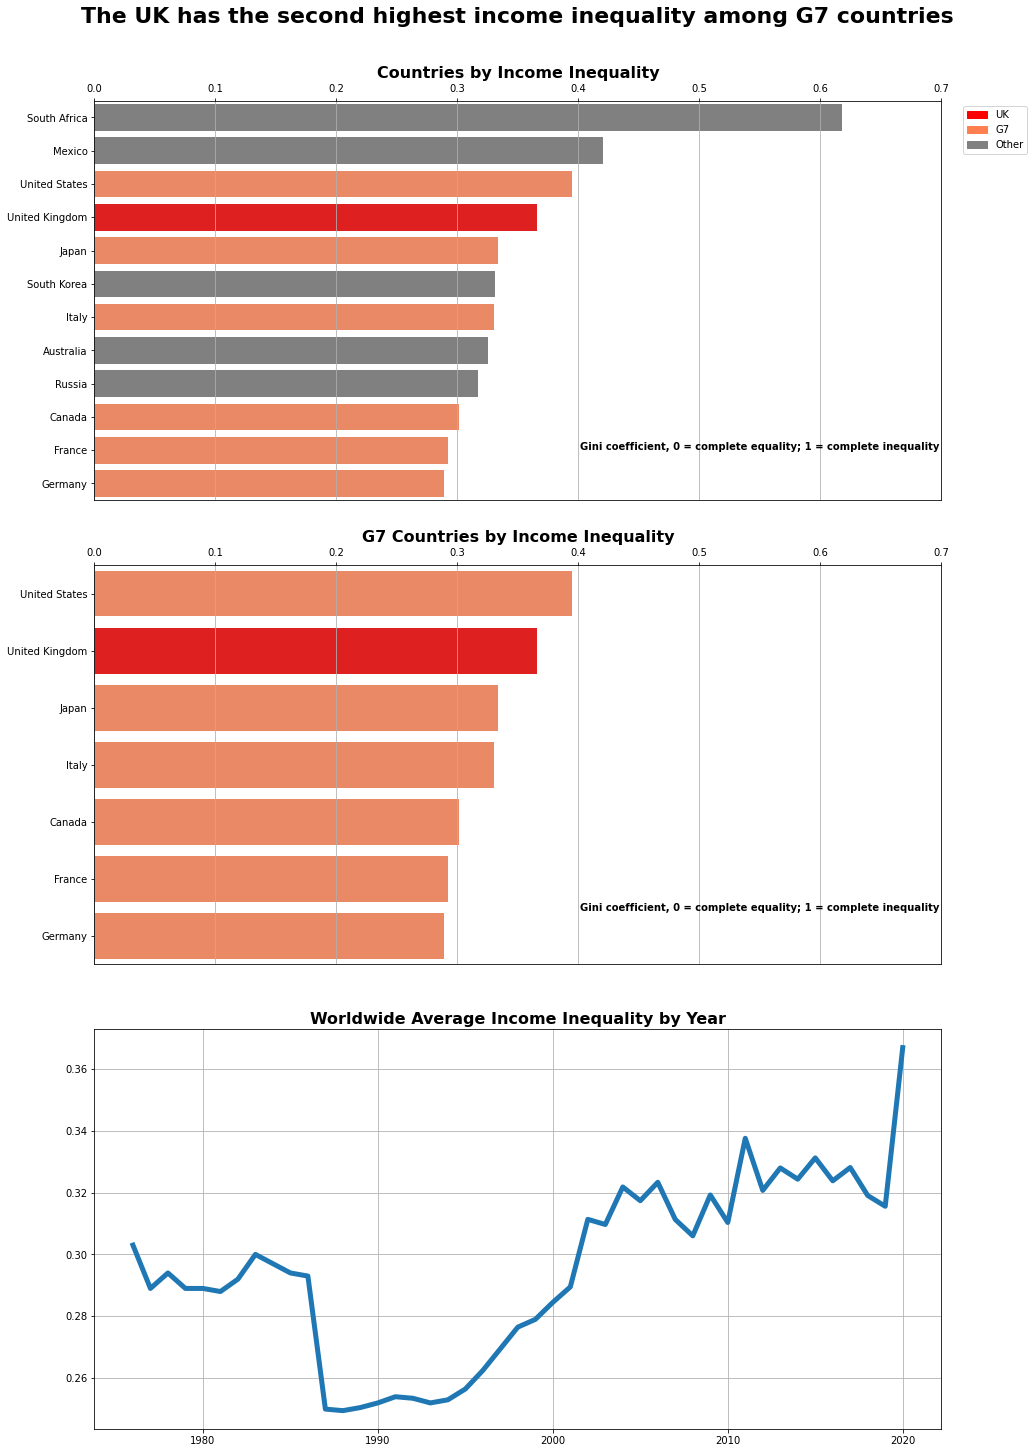

In [72]:
fig, axes = plt.subplots(nrows = 3, figsize = (15, 20))

sns.barplot(data = plot_df, x = 'VALUE', y = 'COUNTRY', palette = color_map, ax = axes[0])
axes[0].set_title('Countries by Income Inequality', fontsize = 16, fontweight = 'bold')

sns.barplot(data = plot3_df, x = 'VALUE', y = 'COUNTRY', palette = color_map2, ax = axes[1])
axes[1].set_title('G7 Countries by Income Inequality', fontsize = 16, fontweight = 'bold')

sns.lineplot(data = plot2_df, x = 'YEAR', y = 'VALUE', ax = axes[2], linewidth = 5)
axes[2].set_title('Worldwide Average Income Inequality by Year', fontsize = 16, fontweight = 'bold')

axes[0].set(xlabel=None, ylabel=None)
axes[1].set(xlabel=None, ylabel=None)
axes[2].set(xlabel=None, ylabel=None)

axes[0].set_xlim(0.0, 0.7)
axes[1].set_xlim(0.0, 0.7)

axes[0].xaxis.set_ticks_position('top')
axes[0].grid(axis='x')
axes[1].xaxis.set_ticks_position('top')
axes[1].grid(axis='x')
axes[2].grid(axis='both')

axes[0].text(.55,9.9, 'Gini coefficient, 0 = complete equality; 1 = complete inequality', horizontalalignment = 'center', verticalalignment = 'center', fontweight = 'bold')
axes[1].text(.55,5.5, 'Gini coefficient, 0 = complete equality; 1 = complete inequality', horizontalalignment = 'center', verticalalignment = 'center', fontweight = 'bold')

uk_patch = mpatches.Patch(color = 'red', label = 'UK')
g7_patch = mpatches.Patch(color = 'coral', label = 'G7')
nong7_patch = mpatches.Patch(color = 'grey', label = 'Other')

axes[0].legend(loc='upper left', handles = [uk_patch, g7_patch, nong7_patch], bbox_to_anchor=(1.02,1))

suptitle = fig.suptitle('The UK has the second highest income inequality among G7 countries', fontsize = 22, fontweight = 'bold', y = 1.02)

fig.tight_layout(pad = 3)
fig.savefig('figure.png', dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[suptitle])